## Telecom Churn Case Study

Team Member: 
    1. Shrey Singh
    2. Anusha Saxena

Problem Statement

    In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.o reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
    
    To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

    In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


In [132]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV,cross_val_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [133]:
# Importing seen data set named as train Data Set we have
telecom_data= pd.read_csv("train.csv")

# Importing unseen data set named as test, sample & Data Dictionary  Set we have
unseen= pd.read_csv("test.csv")
sample= pd.read_csv("sample.csv")
data_dict= pd.read_csv("data_dictionary.csv")


In [134]:
# Lets find shape of each and every data set imported earlier
print(telecom_data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [135]:
# First for understanding of terminology coloumns , look out Data Dictionary
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [136]:
# Increasing Display Table a bit 
pd.set_option('display.max_columns',100)
pd.set_option("display.max_rows",100)

In [137]:
telecom_data.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,...,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.91,0.00,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.8,308.89,213.47,0.0,0.00,0.0,0.0,35.00,0.0,0.0,35.12,0.0,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [138]:
# Further setting index to  id
telecom_data= telecom_data.set_index("id")
telecom_data

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,...,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.00,352.91,0.00,0.00,3.96,0.00,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.00,0.00,0.00,0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.0,0.0,0.0,0.0,28.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,882,0.00,0.00,0.00,0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.60,0.56,0.0,0.0,0.0,0.0,0.0,16.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,982,0.00,0.00,0.00,0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4.35,...,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.00,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [139]:
# Using info command to get structural information
telecom_data.info(verbose=1, show_counts=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 171 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    circle_id                 69999 non-null  int64  
 1    loc_og_t2o_mou            69297 non-null  float64
 2    std_og_t2o_mou            69297 non-null  float64
 3    loc_ic_t2o_mou            69297 non-null  float64
 4    last_date_of_month_6      69999 non-null  object 
 5    last_date_of_month_7      69600 non-null  object 
 6    last_date_of_month_8      69266 non-null  object 
 7    arpu_6                    69999 non-null  float64
 8    arpu_7                    69999 non-null  float64
 9    arpu_8                    69999 non-null  float64
 10   onnet_mou_6               67231 non-null  float64
 11   onnet_mou_7               67312 non-null  float64
 12   onnet_mou_8               66296 non-null  float64
 13   offnet_mou_6              67231 non-null  fl

In [140]:
# Now checking numerical description using describe command
telecom_data.describe(include='all')

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,...,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,...,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
unique,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,69999,69600,69266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,109.0,0.0,0.0,0.0,NaN,NaN,NaN,283.134365,278.185912,278.8588

##### Looking above table we have to go for Data Cleaning as Nan values are present and max. as well as min. are same

### Data Cleaning

In [141]:
# Let's check for missing values 
telecom_data.isnull().sum().sort_values(ascending=True).head(100)

circle_id                  0
last_day_rch_amt_8         0
last_day_rch_amt_7         0
last_day_rch_amt_6         0
max_rech_amt_8             0
max_rech_amt_7             0
max_rech_amt_6             0
total_rech_amt_8           0
total_rech_amt_7           0
total_rech_amt_6           0
total_rech_num_8           0
total_rech_num_7           0
total_rech_num_6           0
total_ic_mou_8             0
total_ic_mou_7             0
total_ic_mou_6             0
jun_vbc_3g                 0
total_og_mou_8             0
vol_2g_mb_6                0
total_og_mou_7             0
vol_2g_mb_7                0
vol_3g_mb_6                0
jul_vbc_3g                 0
aug_vbc_3g                 0
aon                        0
sachet_3g_8                0
sachet_3g_7                0
sachet_3g_6                0
monthly_3g_8               0
monthly_3g_7               0
monthly_3g_6               0
sachet_2g_8                0
sachet_2g_7                0
sachet_2g_6                0
monthly_2g_8  

In [142]:
# As we can see above missing value counts is upto 51000 in nos.,
# Dropping all the columns which have missing values greater than 2687, 
for col in telecom_data.columns:
    if telecom_data[col].isnull().sum()>=2687:
        telecom_data.drop(col,1,inplace=True)

In [143]:
# After Dropping coloumns checking perc. missing Values
round(100*(telecom_data.isnull().sum()/len(telecom_data.index)),2).sort_values(ascending=False).head(100)

date_of_last_rech_8     3.52
date_of_last_rech_7     1.76
date_of_last_rech_6     1.57
last_date_of_month_8    1.05
std_og_t2o_mou          1.00
loc_ic_t2o_mou          1.00
loc_og_t2o_mou          1.00
last_date_of_month_7    0.57
vol_2g_mb_8             0.00
sachet_2g_7             0.00
vol_3g_mb_6             0.00
vol_3g_mb_7             0.00
vol_3g_mb_8             0.00
monthly_2g_6            0.00
monthly_2g_7            0.00
monthly_2g_8            0.00
sachet_2g_6             0.00
monthly_3g_6            0.00
sachet_2g_8             0.00
vol_2g_mb_6             0.00
monthly_3g_7            0.00
monthly_3g_8            0.00
sachet_3g_6             0.00
sachet_3g_7             0.00
sachet_3g_8             0.00
aon                     0.00
aug_vbc_3g              0.00
jul_vbc_3g              0.00
jun_vbc_3g              0.00
vol_2g_mb_7             0.00
circle_id               0.00
last_day_rch_amt_8      0.00
total_ic_mou_8          0.00
last_date_of_month_6    0.00
arpu_6        

In [144]:
# After droping columns shape of dataset
telecom_data.shape

(69999, 54)

In [145]:
# Checking if there are columns with one unique value since it won't affect our analysis
telecom_data.nunique(dropna=True)

circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
arpu_6                  61615
arpu_7                  61425
arpu_8                  60194
total_og_mou_6          33135
total_og_mou_7          33195
total_og_mou_8          32897
total_ic_mou_6          27432
total_ic_mou_7          27418
total_ic_mou_8          27318
total_rech_num_6           94
total_rech_num_7           96
total_rech_num_8           92
total_rech_amt_6         2108
total_rech_amt_7         2147
total_rech_amt_8         2149
max_rech_amt_6            190
max_rech_amt_7            178
max_rech_amt_8            202
date_of_last_rech_6        30
date_of_last_rech_7        31
date_of_last_rech_8        31
last_day_rch_amt_6        179
last_day_rch_amt_7        166
last_day_rch_amt_8        191
vol_2g_mb_6             11494
vol_2g_mb_7             11443
vol_2g_mb_

In [146]:
#Get the value counts of all the columns
for column in telecom_data:
    print(telecom_data[column].astype('category').value_counts())
    print('______________')

109    69999
Name: circle_id, dtype: int64
______________
0.0    69297
Name: loc_og_t2o_mou, dtype: int64
______________
0.0    69297
Name: std_og_t2o_mou, dtype: int64
______________
0.0    69297
Name: loc_ic_t2o_mou, dtype: int64
______________
6/30/2014    69999
Name: last_date_of_month_6, dtype: int64
______________
7/31/2014    69600
Name: last_date_of_month_7, dtype: int64
______________
8/31/2014    69266
Name: last_date_of_month_8, dtype: int64
______________
0.0          2603
-5.0           72
20.0           72
1.0            49
1.5            38
             ... 
154.008         1
154.027         1
154.05          1
154.056         1
27731.088       1
Name: arpu_6, Length: 61615, dtype: int64
______________
0.0          2666
-5.0          107
20.0           49
1.0            38
1.5            37
             ... 
148.504         1
148.515         1
148.535         1
148.544         1
35145.834       1
Name: arpu_7, Length: 61425, dtype: int64
______________
0.0          3898


0.0        54219
0.01          69
0.02          60
0.04          35
0.03          32
           ...  
108.6          1
108.61         1
108.63         1
108.77         1
7873.55        1
Name: vol_2g_mb_7, Length: 11443, dtype: int64
______________
0.0         54078
0.01           73
0.02           51
0.03           39
0.07           35
            ...  
102.48          1
102.47          1
102.42          1
102.4           1
11117.61        1
Name: vol_2g_mb_8, Length: 11359, dtype: int64
______________
0.0        59807
0.01          11
0.03           9
0.02           8
0.09           7
           ...  
354.3          1
354.44         1
354.64         1
354.71         1
45735.4        1
Name: vol_3g_mb_6, Length: 9768, dtype: int64
______________
0.0         59234
0.01           14
0.02            7
0.07            7
0.06            6
            ...  
349.09          1
349.15          1
349.19          1
349.45          1
28144.12        1
Name: vol_3g_mb_7, Length: 10296, dtype: int6

In [147]:
# Dropping columns having unique value
telecom_churn = telecom_data.drop(["circle_id","loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou",
                  "last_date_of_month_6","last_date_of_month_7","last_date_of_month_8",
                  ],axis=1)

In [148]:
# After Dropping coloumns checking null Values
telecom_churn.isnull().sum().sort_values(ascending=False).head(100)

date_of_last_rech_8    2461
date_of_last_rech_7    1234
date_of_last_rech_6    1101
arpu_6                    0
sachet_2g_7               0
vol_3g_mb_6               0
vol_3g_mb_7               0
vol_3g_mb_8               0
monthly_2g_6              0
monthly_2g_7              0
monthly_2g_8              0
sachet_2g_6               0
sachet_2g_8               0
vol_2g_mb_7               0
monthly_3g_6              0
monthly_3g_7              0
monthly_3g_8              0
sachet_3g_6               0
sachet_3g_7               0
sachet_3g_8               0
aon                       0
aug_vbc_3g                0
jul_vbc_3g                0
jun_vbc_3g                0
vol_2g_mb_8               0
last_day_rch_amt_8        0
vol_2g_mb_6               0
total_rech_num_7          0
arpu_8                    0
total_og_mou_6            0
total_og_mou_7            0
total_og_mou_8            0
total_ic_mou_6            0
total_ic_mou_7            0
total_ic_mou_8            0
total_rech_num_6    

In [149]:
# Droping rows having null values date_of_last_rech_8 ,date_of_last_rech_7, date_of_last_rech_6
telecom_churn = telecom_churn[~pd.isnull(telecom_churn["date_of_last_rech_8"])]

telecom_churn = telecom_churn[~pd.isnull(telecom_churn["date_of_last_rech_7"])]

telecom_churn = telecom_churn[~pd.isnull(telecom_churn["date_of_last_rech_6"])]

In [150]:
# After Dropping rows checking null Values again
telecom_churn.isnull().sum().sort_values(ascending=False).head(100)

arpu_6                 0
sachet_2g_8            0
vol_2g_mb_8            0
vol_3g_mb_6            0
vol_3g_mb_7            0
vol_3g_mb_8            0
monthly_2g_6           0
monthly_2g_7           0
monthly_2g_8           0
sachet_2g_6            0
sachet_2g_7            0
monthly_3g_6           0
vol_2g_mb_6            0
monthly_3g_7           0
monthly_3g_8           0
sachet_3g_6            0
sachet_3g_7            0
sachet_3g_8            0
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
vol_2g_mb_7            0
last_day_rch_amt_8     0
arpu_7                 0
total_rech_num_8       0
arpu_8                 0
total_og_mou_6         0
total_og_mou_7         0
total_og_mou_8         0
total_ic_mou_6         0
total_ic_mou_7         0
total_ic_mou_8         0
total_rech_num_6       0
total_rech_num_7       0
total_rech_amt_6       0
last_day_rch_amt_7     0
total_rech_amt_7       0
total_rech_amt_8       0
max_rech_amt_6         0


#### As we can see data is having zero null values

In [151]:
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65945 entries, 0 to 69998
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   arpu_6               65945 non-null  float64
 1   arpu_7               65945 non-null  float64
 2   arpu_8               65945 non-null  float64
 3   total_og_mou_6       65945 non-null  float64
 4   total_og_mou_7       65945 non-null  float64
 5   total_og_mou_8       65945 non-null  float64
 6   total_ic_mou_6       65945 non-null  float64
 7   total_ic_mou_7       65945 non-null  float64
 8   total_ic_mou_8       65945 non-null  float64
 9   total_rech_num_6     65945 non-null  int64  
 10  total_rech_num_7     65945 non-null  int64  
 11  total_rech_num_8     65945 non-null  int64  
 12  total_rech_amt_6     65945 non-null  int64  
 13  total_rech_amt_7     65945 non-null  int64  
 14  total_rech_amt_8     65945 non-null  int64  
 15  max_rech_amt_6       65945 non-null 

In [152]:
# Further one more Convert date columns to date format as these columns are object data

telecom_churn["date_of_last_rech_6"]= pd.to_datetime(telecom_data["date_of_last_rech_6"],format = "%m/%d/%Y")
telecom_churn["date_of_last_rech_7"]= pd.to_datetime(telecom_data["date_of_last_rech_7"],format = "%m/%d/%Y")
telecom_churn["date_of_last_rech_8"]= pd.to_datetime(telecom_data["date_of_last_rech_8"],format = "%m/%d/%Y")

# checking the data types again whether it'

In [153]:
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65945 entries, 0 to 69998
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   arpu_6               65945 non-null  float64       
 1   arpu_7               65945 non-null  float64       
 2   arpu_8               65945 non-null  float64       
 3   total_og_mou_6       65945 non-null  float64       
 4   total_og_mou_7       65945 non-null  float64       
 5   total_og_mou_8       65945 non-null  float64       
 6   total_ic_mou_6       65945 non-null  float64       
 7   total_ic_mou_7       65945 non-null  float64       
 8   total_ic_mou_8       65945 non-null  float64       
 9   total_rech_num_6     65945 non-null  int64         
 10  total_rech_num_7     65945 non-null  int64         
 11  total_rech_num_8     65945 non-null  int64         
 12  total_rech_amt_6     65945 non-null  int64         
 13  total_rech_amt_7     65945 non-

In [154]:
# Further description of final clean data set named as telecom_churn
telecom_churn.describe()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000,65945.000000
mean,287.297126,287.635352,289.113693,312.659935,321.711233,315.425999,203.499284,208.366015,205.810730,7.755872,7.991372,7.527576,333.889499,333.762620,337.499932,104.884085,106.022534,111.395678,63.293502,60.178421,64.579832,53.272911,53.634959,52.466220,126.271991,134.895435,142.620144,0.081234,0.087270,0.084843,0.402623,0.463037,0.472727,0.077959,0.080795,0.085981,0.077610,0.084859,0.089908,1227.394374,71.438013,68.717913,61.794209,0.082569
std,332.321661,347.882184,356.136185,468.616515,484.639874,481.928555,290.283914,300.240737,292.082412,7.037206,7.073154,7.197842,401.474014,416.008477,431.034407,116.784643,118.748937,123.586604,92.228080,93.337797,101.523678,215.672803,216.178433,217.570843,566.677293,567.469378,583.122351,0.298095,0.311356,0.305642,1.522542,1.692015,1.671987,0.364643,0.391580,0.391289,0.583561,0.650744,0.699343,952.619688,274.513268,273.928108,261.376549,0.275231
min,-810.661000,-622.509000,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,95.329000,94.529000,93.127000,47.810000,49.110000,45.780000,41.810000,46.210000,44.090000,3.000000,4.000000,3.000000,110.000000,110.000000,110.000000,30.000000,30.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,472.000000,0.000000,0.000000,0.000000,0.000000
50%,201.673000,200.707000,202.185000,149.530000,150.740000,148.080000,118.190000,121.840000,120.930000,6.000000,6.000000,5.000000,234.000000,230.000000,240.000000,110.000000,110.000000,100.000000,30.000000,30.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,879.000000,0.000000,0.000000,0.000000,0.000000
75%,376.804000,375.538000,381.206000,383.540000,397.090000,386.980000,255.440000,256.960000,257.930000,10.000000,10.000000,9.000000,444.000000,440.000000,450.000000,120.000000,128.000000,145.000000,110.000000,110.000000,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1824.000000,0.000000,0.000000,0.000000,0.000000
max,27731.088000,35145.834000,33543.624000,10674.030000,8285.640000,14043.060000,7716.140000,9699.010000,10830.380000,170.000000,138.000000,138.000000,35190.000000,40335.000000,45320.000000,3559.000000,3299.000000,4449.

### Our Data set is completely cleaned , we are ready to perform EDA on it
## EDA

#### Filtering High Value customers

In [155]:
for col in telecom_churn.columns:
    if col.startswith('total_rech_amt') :
        print(col)

total_rech_amt_6
total_rech_amt_7
total_rech_amt_8


To filter high-value customers, need to do the following steps:
- Find Average recharge amount in the first 2 months i.e. the good phase
- Find the 70th percentile of that average recharge amount
- Get customers who have the average recharge of equal or more than 70th percentile of the average recharge amount

In [156]:
telecom_churn['total_rech_amt_avg'] = (telecom_churn['total_rech_amt_6'] + telecom_churn['total_rech_amt_7']) / 2
telecom_churn.shape

(65945, 48)

In [157]:
telecom_churn['total_rech_amt_avg'].quantile([0.7])

0.7    378.5
Name: total_rech_amt_avg, dtype: float64

<AxesSubplot:xlabel='churn_probability', ylabel='count'>

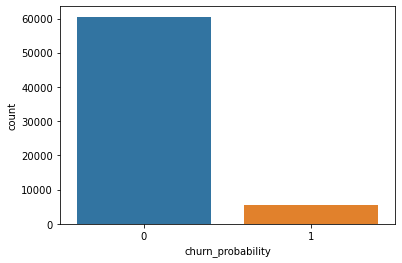

In [158]:
sns.countplot(x="churn_probability",data = telecom_churn)

 Age on Network

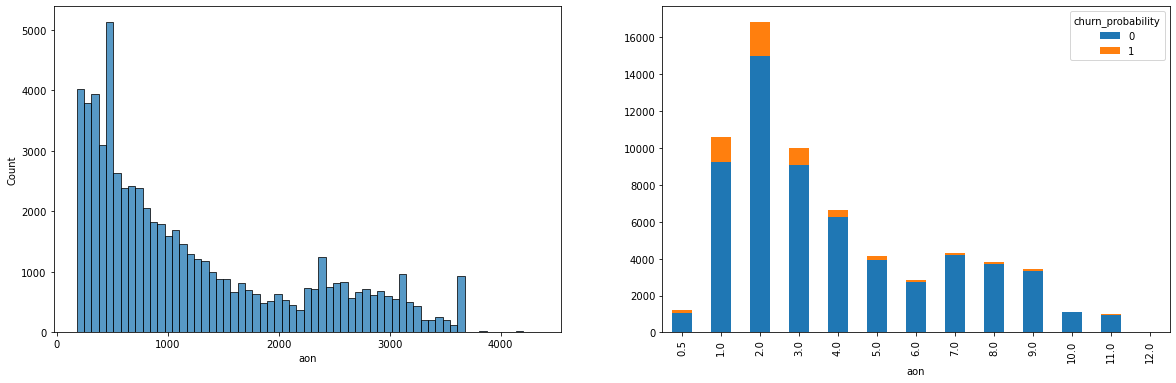

In [159]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

# distribution plot for aon
sns.histplot(telecom_churn['aon'], ax=ax1)

# bin the aon column with yearwise segments and plot the counts for each segments
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

pd.crosstab(pd.cut(round(((telecom_churn['aon']/30)/12),1), bins = bins, labels = labels ), telecom_churn['churn_probability']).plot(kind='bar', stacked=True, ax = ax2)
plt.show()

Observations:
    As we can see churn rate is higher in years 1 to 3
    

Incoming Call Usage

In [160]:
cols =[["total_ic_mou_6"],
      ["total_ic_mou_7"],["total_ic_mou_8"]]
#column description stats
for i in range(0,3):
    display(telecom_churn[cols[i]].describe())

,total_ic_mou_6
count,65945.000000
mean,203.499284
std,290.283914
min,0.000000
25%,41.810000
50%,118.190000
75%,255.440000
max,7716.140000


,total_ic_mou_7
count,65945.000000
mean,208.366015
std,300.240737
min,0.000000
25%,46.210000
50%,121.840000
75%,256.960000
max,9699.010000


,total_ic_mou_8
count,65945.000000
mean,205.810730
std,292.082412
min,0.000000
25%,44.090000
50%,120.930000
75%,257.930000
max,10830.380000


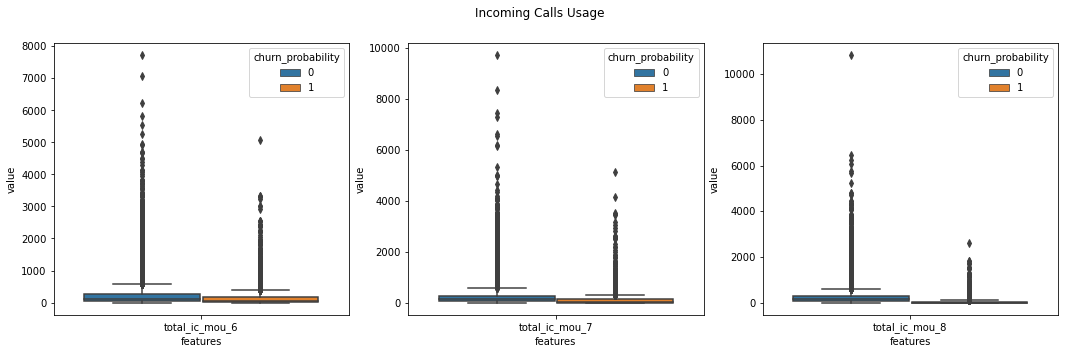

In [161]:
# Boxplot for the incoming calls usage
plt.figure(figsize=(18, 5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([telecom_churn[cols[i]],telecom_churn['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability",data = X)
    plt.xticks(rotation=0)    
    plt.suptitle('Incoming Calls Usage')

##### Observation: Boxplot clearly shows presence of outliers

Outgoing Call Usage

In [162]:
cols=[['total_og_mou_6'],
        ['total_og_mou_7'],
        ['total_og_mou_8']]
# column description stats
for i in range(0,3):
    display(telecom_churn[cols[i]].describe())

,total_og_mou_6
count,65945.000000
mean,312.659935
std,468.616515
min,0.000000
25%,47.810000
50%,149.530000
75%,383.540000
max,10674.030000


,total_og_mou_7
count,65945.000000
mean,321.711233
std,484.639874
min,0.000000
25%,49.110000
50%,150.740000
75%,397.090000
max,8285.640000


,total_og_mou_8
count,65945.000000
mean,315.425999
std,481.928555
min,0.000000
25%,45.780000
50%,148.080000
75%,386.980000
max,14043.060000


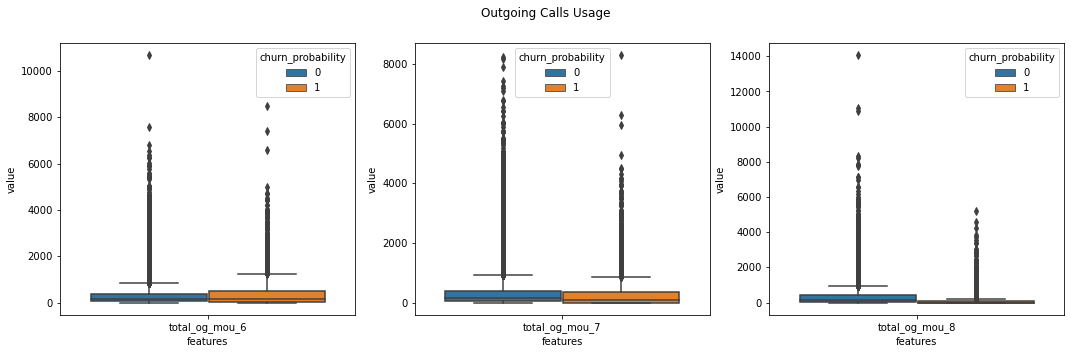

In [163]:
# Boxplot for the outgoing calls usage
plt.figure(figsize=(18, 5))
#og call usage
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([telecom_churn[cols[i]], telecom_churn['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=0)    
    plt.suptitle('Outgoing Calls Usage')

##### Observation: Boxplot Clearly shows presence of outliers 

Recharge Count

In [164]:
cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8']
# column description stats
for i in range(0,3):
    display(telecom_churn[cols[i]].describe())

count    65945.000000
mean         7.755872
std          7.037206
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max        170.000000
Name: total_rech_num_6, dtype: float64

count    65945.000000
mean         7.991372
std          7.073154
min          1.000000
25%          4.000000
50%          6.000000
75%         10.000000
max        138.000000
Name: total_rech_num_7, dtype: float64

count    65945.000000
mean         7.527576
std          7.197842
min          1.000000
25%          3.000000
50%          5.000000
75%          9.000000
max        138.000000
Name: total_rech_num_8, dtype: float64

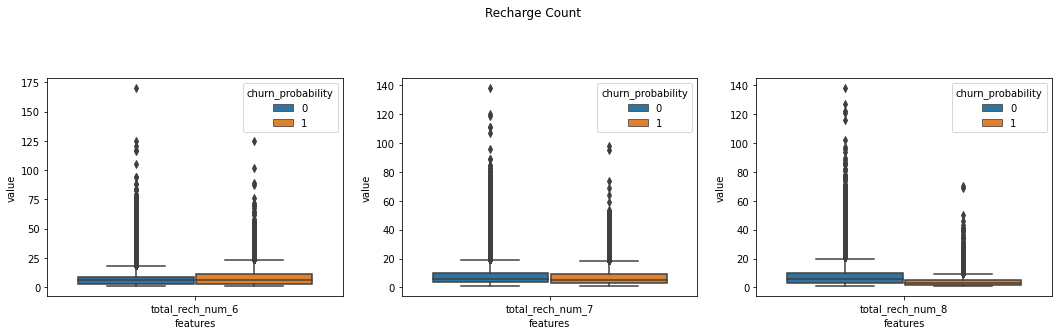

In [165]:
# Boxplot for the recharge count columns
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
for i in range(0,3):
    plt.subplot(2,3,i+1)
    X = pd.concat([telecom_churn[cols[i]], telecom_churn['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=0)    
    plt.suptitle('Recharge Count')

##### Observation: Boxplot Clearly shows presence of outliers

Average Revenue Per User(arpu)

In [166]:
cols = ['arpu_6','arpu_7','arpu_8']
# column description stats
for i in range(0,3):
    display(telecom_churn[cols[i]].describe())

count    65945.000000
mean       287.297126
std        332.321661
min       -810.661000
25%         95.329000
50%        201.673000
75%        376.804000
max      27731.088000
Name: arpu_6, dtype: float64

count    65945.000000
mean       287.635352
std        347.882184
min       -622.509000
25%         94.529000
50%        200.707000
75%        375.538000
max      35145.834000
Name: arpu_7, dtype: float64

count    65945.000000
mean       289.113693
std        356.136185
min       -345.129000
25%         93.127000
50%        202.185000
75%        381.206000
max      33543.624000
Name: arpu_8, dtype: float64

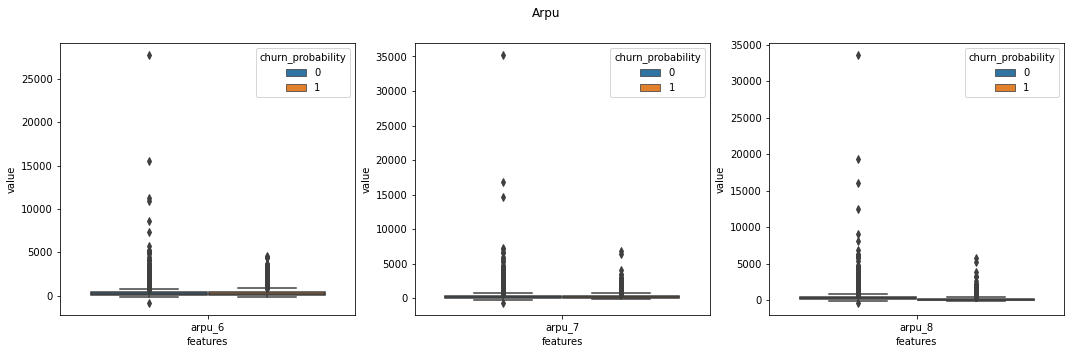

In [167]:
# Boxplot for the arpu
plt.figure(figsize=(18, 5))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    X = pd.concat([telecom_churn[cols[i]], telecom_churn['churn_probability']], axis=1)
    X = pd.melt(X,id_vars="churn_probability",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="churn_probability", data=X)
    plt.xticks(rotation=0)    
    plt.suptitle('Arpu')

##### Conclusion: Same observation like above features presence of outliers in top percentiles

Outlier Reduction

In [168]:
for col in telecom_churn.columns:
    percentiles = telecom_churn[col].quantile([0.01, 0.99]).values
    telecom_churn[col][telecom_churn[col] <= percentiles[0]] = percentiles[0]
    telecom_churn[col][telecom_churn[col] >= percentiles[1]] = percentiles[1]

In [169]:
telecom_churn.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'total_rech_amt_avg'],
      dtype='object')

In [170]:
# Lets find correlation among the features
telecom_churn.corr()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_amt_avg
arpu_6,1.000000,0.724658,0.605169,0.770374,0.574879,0.463702,0.354766,0.288584,0.250643,0.580607,0.336793,0.230940,0.955887,0.701408,0.583566,0.513989,0.402741,0.348461,0.383342,0.310652,0.253891,0.117481,0.067915,0.051297,0.280176,0.228889,0.209029,0.119667,0.072531,0.059497,0.063838,0.033941,0.039052,0.270851,0.207126,0.194848,0.106116,0.071513,0.052467,0.032991,0.190269,0.210447,0.239686,0.025924,0.902732
arpu_7,0.724658,1.000000,0.750532,0.580995,0.764936,0.605623,0.266007,0.340978,0.293475,0.396276,0.532520,0.354411,0.721853,0.955941,0.725618,0.404595,0.533660,0.414528,0.332408,0.419375,0.292136,0.076524,0.116645,0.074863,0.217242,0.293477,0.236869,0.076895,0.124245,0.071275,0.029052,0.068853,0.052262,0.205563,0.285910,0.210192,0.071683,0.111215,0.064047,0.027930,0.213045,0.238939,0.195172,-0.038547,0.917701
arpu_8,0.605169,0.750532,1.000000,0.452632,0.596139,0.761205,0.228105,0.281910,0.356141,0.294478,0.385070,0.516995,0.594115,0.746939,0.955470,0.349074,0.435575,0.540216,0.272285,0.370429,0.390329,0.062216,0.073602,0.120305,0.198682,0.235984,0.305973,0.075389,0.085765,0.127419,0.010993,0.035734,0.083245,0.190371,0.220595,0.295036,0.060347,0.077177,0.103885,0.041981,0.251160,0.205882,0.181673,-0.159759,0.732679
total_og_mou_6,0.770374,0.580995,0.452632,1.000000,0.736799,0.585093,0.284086,0.210903,0.170102,0.510576,0.312204,0.223920,0.757562,0.561867,0.438599,0.273556,0.223779,0.181369,0.228460,0.196675,0.132649,-0.034626,-0.036332,-0.039703,-0.007034,-0.007750,-0.011766,-0.020769,-0.031287,-0.037759,-0.020961,-0.026095,-0.011564,0.017481,0.013501,0.005895,-0.006872,-0.008023,-0.018824,-0.012664,-0.003893,-0.001301,0.005041,0.044721,0.716708
total_og_mou_7,0.574879,0.764936,0.596139,0.736799,1.000000,0.778759,0.179330,0.262244,0.210308,0.360727,0.480978,0.345405,0.576983,0.749218,0.576881,0.210856,0.281768,0.232613,0.199858,0.267423,0.167441,-0.045370,-0.035313,-0.036542,-0.023698,-0.009049,-0.012977,-0.026808,-0.024619,-0.035967,-0.040077,-0.015452,-0.005774,0.007754,0.018753,0.003088,-0.021701,-0.008011,-0.018220,-0.024630,-0.007433,-0.005317,-0.013714,-0.025231,0.722443
total_og_mou_8,0.463702,0.605623,0.761205,0.585093,0.778759,1.000000,0.140320,0.200657,0.274283,0.268989,0.373361,0.486313,0.462132,0.605009,0.745243,0.165903,0.237780,0.299264,0.151050,0.245941,0.231330,-0.047330,-0.041136,-0.027981,-0.022311,-0.009045,-0.000789,-0.029290,-0.026840,-0.023460,-0.045768,-0.024647,0.002876,0.002457,0.015912,0.013477,-0.020704,-0.006339,-0.008540,-0.015882,0.001539,-0.004913,-0.011502,-0.137859,0.580447
total_ic_mou_6,0.354766,0.266007,0.228105,0.284086,0.179330,0.140320,1.000000,0.810256,0.719722,0.200520,0.081377,0.029882,0.341024,0.252946,0.218425,0.237833,0.204172,0.189210,0.172124,0.156476,0.156857,0.016723,0.009712,-0.000262,0.066369,0.064345,0.061932,0.068514,0.057789,0.055171,0.003498,-0.007787,-0.002368,0.061142,0.060019,0.059955,0.013633,0.009854,0.003232,0.166793,0.087962,0.090991,0.094140,-0.082180,0.323114
total_ic_mou_7,0.288584,0.340978,0.281910,0.210903,0.262244,0.200657,0.810256,1.000000,0.830166,0.136301,0.151020,0.077565,0.279448,0.328034,0.271116,0.215080,0.241400,0.218036,0.164073,0.195200,0.172729,0.009810,0.010657,0.002397,0.056961,0.071817,0.062678,0.061307,0.062029,0.054147,-0.008196,-0.002621,-0.001102,0.057674,0.067440,0.061584,0.008979,0.014413,0.005553,0.161667,0.089189,0.095158,0.084356,-0.11

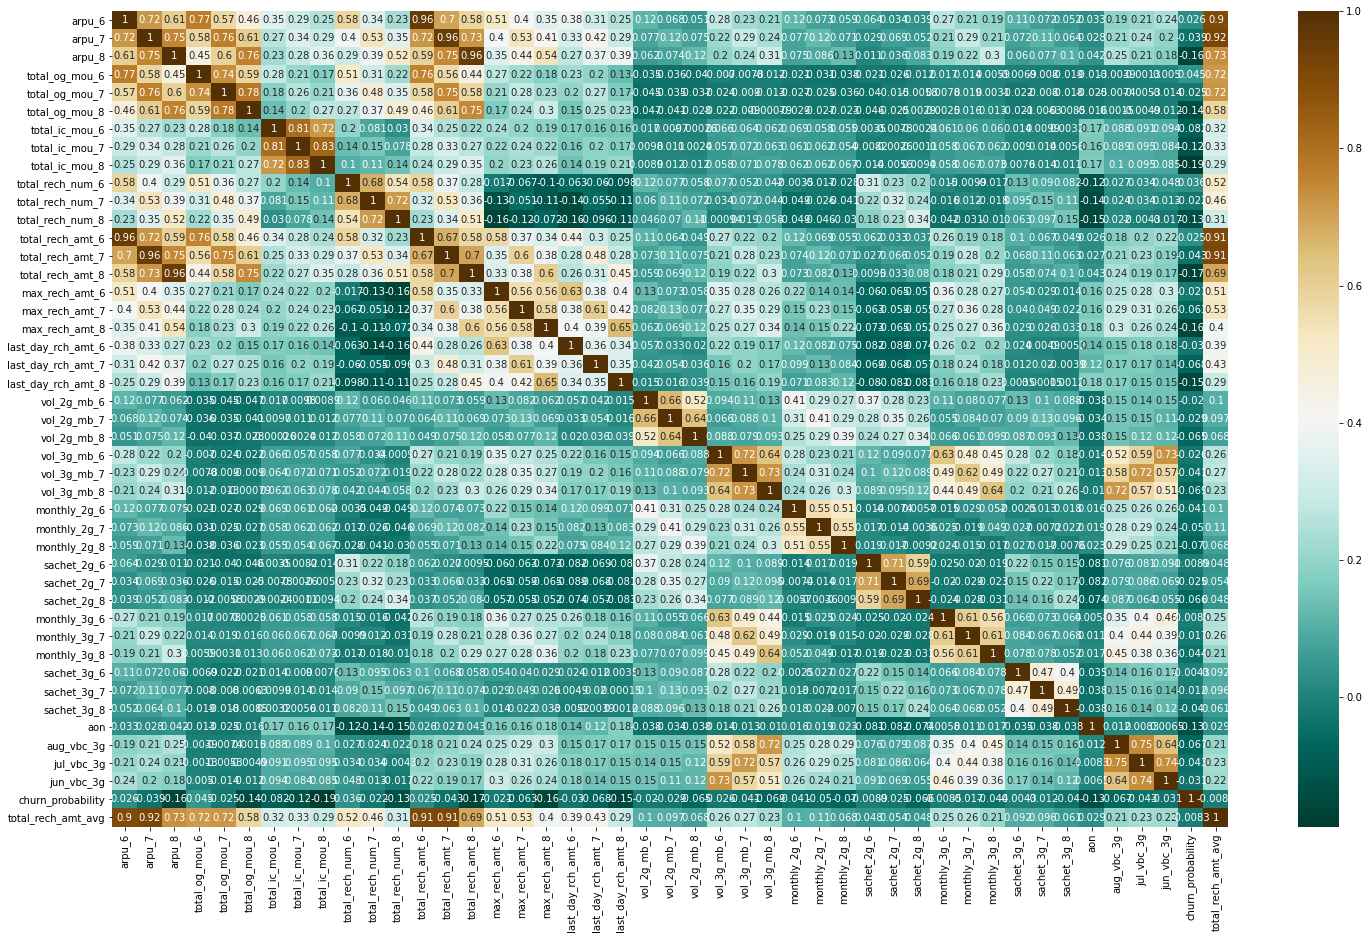

In [171]:
# Now plotting above matrix for visualization
corr= telecom_churn.corr()
plt.figure(figsize = (25,15))
sns.heatmap(corr, 
            cmap="BrBG_r", annot=True)
plt.show()

In [172]:
# choosing the variables with less correlation among themselves
new_var=['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8','aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g']

### Feature Engineering

Earlier we have converted the date columns to datetime format , now we will extract the columns from last recharge date and days since last recharge

In [173]:
# total columns
cols = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
telecom_churn['mean_total_ic_mou'] = round(telecom_churn[cols].mean(axis=1),2)

In [174]:
# Weightage for ic for the last 3 months
df = telecom_churn[cols].astype(bool)
telecom_churn['total_ic_weightage'] = ( df['total_ic_mou_6'] * 1 ) + ( df['total_ic_mou_7'] * 10 ) + ( df['total_ic_mou_8'] * 100 )

cols = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
telecom_churn['mean_total_og_mou'] = round(telecom_churn[cols].mean(axis=1),2)

In [175]:
# Weightage for og for the last 3 months
df = telecom_churn[cols].astype(bool)
telecom_churn['total_og_weightage'] = ( df['total_og_mou_6'] * 1 ) + ( df['total_og_mou_7'] * 10 ) + ( df['total_og_mou_8'] * 100 )

telecom_churn['mean_total_mou'] = telecom_churn['mean_total_ic_mou'] + telecom_churn['mean_total_og_mou']

telecom_churn['mean_total_mou_6'] = round(telecom_churn[['total_ic_mou_6','total_og_mou_6']].mean(axis=1),2)
telecom_churn['mean_total_mou_7'] = round(telecom_churn[['total_ic_mou_7','total_og_mou_7']].mean(axis=1),2)
telecom_churn['mean_total_mou_8'] = round(telecom_churn[['total_ic_mou_8','total_og_mou_8']].mean(axis=1),2)

In [176]:
cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
# get the recent date of recharge in the last 3 months
telecom_churn['last_rech_date'] = telecom_churn[cols].max(axis=1)
# get the number of days from the recent recharge date till the last date of august month(***** taken reference from Google Stackflow*****)
telecom_churn['days_since_last_rech'] = np.floor(( pd.to_datetime('2014-08-31', format='%Y-%m-%d') - telecom_churn['last_rech_date'] ).astype('timedelta64[D]'))

In [177]:
# Lets Check the dataframe
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65945 entries, 0 to 69998
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   arpu_6                65945 non-null  float64       
 1   arpu_7                65945 non-null  float64       
 2   arpu_8                65945 non-null  float64       
 3   total_og_mou_6        65945 non-null  float64       
 4   total_og_mou_7        65945 non-null  float64       
 5   total_og_mou_8        65945 non-null  float64       
 6   total_ic_mou_6        65945 non-null  float64       
 7   total_ic_mou_7        65945 non-null  float64       
 8   total_ic_mou_8        65945 non-null  float64       
 9   total_rech_num_6      65945 non-null  int64         
 10  total_rech_num_7      65945 non-null  int64         
 11  total_rech_num_8      65945 non-null  int64         
 12  total_rech_amt_6      65945 non-null  int64         
 13  total_rech_amt_7

Now,We will extract the mean, min,max values of recharge related columns for the last three months (June,July,August)

In [181]:
# Extracting features from arpu columns also
# ARPU = Total Revenue / Average Subscribers
cols = ['arpu_6','arpu_7','arpu_8']
telecom_churn['mean_arpu'] = round(telecom_churn[cols].mean(axis=1),2)

cols = ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8']
telecom_churn['mean_vol_2g_mb_data'] = round(telecom_churn[cols].mean(axis=1),2)

cols = ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']
telecom_churn['mean_vol_3g_mb_data'] = round(telecom_churn[cols].mean(axis=1),2)

In [178]:
# max_rech_amt columns
cols = ['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8']
telecom_churn['mean_max_rech_amt'] = round(telecom_churn[cols].mean(axis=1),2)

# last_day_rch_amt columns
cols = ['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']
telecom_churn['mean_last_day_rch_amt'] = round(telecom_churn[cols].mean(axis=1),2)

In [179]:
# total_rech_amt columns
cols = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
telecom_churn['mean_total_rech_amt'] = round(telecom_churn[cols].mean(axis=1),2)
telecom_churn['min_total_rech_amt'] = telecom_churn[cols].min(axis=1)
telecom_churn['max_total_rech_amt'] = telecom_churn[cols].max(axis=1)

In [180]:
# total_rech_num columns
cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8']
# mean of total recharge number
telecom_churn['mean_total_rech_num'] = round(telecom_churn[cols].mean(axis=1),2)
# Minimum of total recharge number
telecom_churn['min_total_rech_num'] = telecom_churn[cols].min(axis=1)
# Maximum of total recharge number
telecom_churn['max_total_rech_num'] = telecom_churn[cols].max(axis=1)

In [182]:
#getting vbc mean for the last three months
cols = ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']
telecom_churn['mean_vbc_3g'] = round(telecom_churn[cols].mean(axis=1),2)

In [183]:
#getting monthly pack weightage for the last three months for both 2G and 3G network
telecom_churn['monthly_2g_weight.'] = ( telecom_churn['monthly_2g_6'] * 1 ) + ( telecom_churn['monthly_2g_7'] * 10 ) + ( telecom_churn['monthly_2g_8'] * 100 )
telecom_churn['monthly_3g_weight.'] = ( telecom_churn['monthly_3g_6'] * 1 ) + ( telecom_churn['monthly_3g_7'] * 10 ) + ( telecom_churn['monthly_3g_8'] * 100 )

#get sachet pack weightage for the last three months for both 2G and 3G network
telecom_churn['sachet_2g_weight.'] = ( telecom_churn['sachet_2g_6'] * 1 ) + ( telecom_churn['sachet_2g_7'] * 10 ) + ( telecom_churn['sachet_2g_8'] * 100 )
telecom_churn['sachet_3g_weight.'] = ( telecom_churn['sachet_3g_6'] * 1 ) + ( telecom_churn['sachet_3g_7'] * 10 ) + ( telecom_churn['sachet_3g_8'] * 100 )

In [184]:
# After deriving other features Lets check for dataframe
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65945 entries, 0 to 69998
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   arpu_6                 65945 non-null  float64       
 1   arpu_7                 65945 non-null  float64       
 2   arpu_8                 65945 non-null  float64       
 3   total_og_mou_6         65945 non-null  float64       
 4   total_og_mou_7         65945 non-null  float64       
 5   total_og_mou_8         65945 non-null  float64       
 6   total_ic_mou_6         65945 non-null  float64       
 7   total_ic_mou_7         65945 non-null  float64       
 8   total_ic_mou_8         65945 non-null  float64       
 9   total_rech_num_6       65945 non-null  int64         
 10  total_rech_num_7       65945 non-null  int64         
 11  total_rech_num_8       65945 non-null  int64         
 12  total_rech_amt_6       65945 non-null  int64         
 13  t

### Dimensionality Reduction using PCA and Feature Selection

In [185]:
# Before final model making creating copy of final dataframe
train_df= telecom_churn.copy()

In [186]:
# Checking tain dataframe 
train_df.info()
train_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65945 entries, 0 to 69998
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   arpu_6                 65945 non-null  float64       
 1   arpu_7                 65945 non-null  float64       
 2   arpu_8                 65945 non-null  float64       
 3   total_og_mou_6         65945 non-null  float64       
 4   total_og_mou_7         65945 non-null  float64       
 5   total_og_mou_8         65945 non-null  float64       
 6   total_ic_mou_6         65945 non-null  float64       
 7   total_ic_mou_7         65945 non-null  float64       
 8   total_ic_mou_8         65945 non-null  float64       
 9   total_rech_num_6       65945 non-null  int64         
 10  total_rech_num_7       65945 non-null  int64         
 11  total_rech_num_8       65945 non-null  int64         
 12  total_rech_amt_6       65945 non-null  int64         
 13  t

(65945, 74)

Data Preprocessing

In [187]:
# Droping Date time columns as they will be not useful during scaling and log transform
train_df = train_df.drop(["date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","last_rech_date"],axis = 1)

In [188]:
# Lets check shape of dataframe
train_df.shape

(65945, 70)

In [189]:
# prepare the dataset
churn = train_df['churn_probability']
train_df = train_df.drop('churn_probability', axis=1)

In [190]:
# Now splitting the columns into category and numerical respectively
cat_cols = ['monthly_2g_6','sachet_2g_6','monthly_3g_6','sachet_3g_6',
            'monthly_2g_7','sachet_2g_7','monthly_3g_7','sachet_3g_7',
            'monthly_2g_8','sachet_2g_8','monthly_3g_8','sachet_3g_8'] 

num_cols = list(set(train_df.columns).difference(set(cat_cols)))

In [191]:
# Now dummy encoding of all categorical columns and further then droping orignal columns
train_df = pd.concat([train_df,pd.get_dummies(train_df[cat_cols], drop_first=True)], axis=1)


In [192]:
# Dropping orignal coloumns
train_df.drop(cat_cols, axis=1, inplace=True)

### Log Transform the numerical features

In [193]:
#As almost all the features are positively skewed, we'll log transform the numerical features to neutralize the positive skewness in the dataset.
## log transform with constant 10000 for real numbers
train_df[num_cols] = np.log((10000 + train_df[num_cols]))
train_df = np.log((10000 + train_df))

### Standardize the numerical features

In [194]:
#Standardize the numeric values
train_df[num_cols] = (( train_df[num_cols] - train_df[num_cols].mean() ) / train_df[num_cols].std())

In [195]:
# Lest have a look of data before model building
train_df.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_avg,mean_total_ic_mou,total_ic_weightage,mean_total_og_mou,total_og_weightage,mean_total_mou,mean_total_mou_6,mean_total_mou_7,mean_total_mou_8,days_since_last_rech,mean_max_rech_amt,mean_last_day_rch_amt,mean_total_rech_amt,min_total_rech_amt,max_total_rech_amt,mean_total_rech_num,min_total_rech_num,max_total_rech_num,mean_arpu,mean_vol_2g_mb_data,mean_vol_3g_mb_data,mean_vbc_3g,monthly_2g_weight.,monthly_3g_weight.,sachet_2g_weight.,sachet_3g_weight.
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.946448,-0.725966,-1.021327,-0.549230,-0.204612,-0.746997,-0.781894,-0.612905,-0.664895,-0.735054,-0.919737,-0.829280,-0.784725,-0.812128,-0.994516,-0.394652,-0.398039,-0.997438,0.061266,0.104120,-0.765940,-0.301727,-0.300905,-0.298360,-0.309507,-0.318495,-0.326231,0.811790,-0.311648,-0.300692,-0.289748,-0.872020,-0.740353,0.292248,-0.556896,0.332052,-0.781782,-0.773827,-0.439007,-0.872746,0.251041,-0.715975,-0.294970,-0.989904,-0.778284,-1.102731,-0.949726,-0.653383,-1.016449,-1.008126,-0.350039,-0.356669,-0.33512,-0.303135,-0.252461,-0.321556,-0.211687
1,-1.068187,-0.588768,-0.886433,-0.759456,-0.682452,-0.674990,-0.818254,-0.670675,-0.731624,-0.735054,-0.606763,-0.369848,-1.035864,-0.556102,-0.866265,-1.098543,0.450711,-0.587846,-0.841793,-0.789842,-0.765940,-0.301727,1.966498,-0.298360,-0.309507,-0.307025,-0.326231,-0.533461,-0.311648,-0.300692,-0.289748,-0.866759,-0.798151,0.292248,-0.787599,0.299127,-0.990775,-0.948638,-0.829593,-0.848481,-0.083102,-0.486807,-1.059904,-0.937232,-0.820454,-0.903739,-0.651206,-0.439572,-0.740128,-0.950863,0.541004,-0.352433,-0.33512,-0.303135,0.041453,-0.321556,-0.211687
2,-0.831861,-0.663910,-1.050049,-0.613042,-0.509670,-0.756336,-0.298058,-0.694528,-0.681739,-0.893632,-0.606763,-0.829280,-0.807476,-0.635893,-1.026659,-0.340695,-0.344795,-1.100092,0.130490,-0.101665,-0.765940,-0.301727,-0.300905,-0.298360,-0.309507,-0.318495,-0.326231,-0.339010,-0.311648,-0.300692,-0.289748,-0.787944,-0.603100,0.292248,-0.699061,-2.976690,-0.827142,-0.603399,-0.708802,-0.887429,0.251041,-0.715975,-0.353640,-0.943367,-0.820454,-0.976742,-0.888946,-0.653383,-0.878282,-0.953400,-0.350039,-0.356669,-0.33512,-0.303135,-0.252461,-0.321556,-0.211687
3,-0.463349,-0.274346,-0.628296,-0.562588,-0.518152,-0.618153,-0.423092,-0.625047,-0.479355,-0.893632,-0.606763,-0.676121,-0.516157,-0.254680,-0.611288,0.089999,0.080210,-0.587846,0.683050,0.719642,-0.147000,-0.301727,-0.300905,-0.298360,-0.309507,-0.318495,-0.326231,-0.227366,-0.311648,-0.300692,-0.289748,-0.422448,-0.550373,0.292248,-0.632929,0.332052,-0.750030,-0.622087,-0.684016,-0.691645,0.083978,-0.174921,0.525245,-0.529327,-0.275505,-0.627958,-0.829955,-0.653383,-0.878282,-0.513169,-0.350039,-0.356669,-0.33512,-0.303135,-0.252461,-0.321556,-0.211687
4,-0.140939,-0.568087,-0.664293,-0.595550,-0.651626,-0.715811,-0.739944,-0.798728,-0.717556,0.849856,0.331786,0.089447,-0.099887,-0.584804,-0.636695,-0.556684,-0.653980,-0.792438,-0.493770,-0.651932,-0.394206,2.214142,1.687931,1.104608,-0.309507,-0.318495,-0.326231,-0.605466,-0.311648,-0.300692,-0.289748,-0.377458,-0.811560,0.292248,-0.731147,0.332052,-0.952898,-0.789871,-0.863884,-0.872979,-0.751587,-0.795337,-0.676935,-0.507537,-0.308838,-0.483837,0.479859,0.629165,0.364601,-0.516361,1.934446,-0.356669,-0.33512,-0.303135,-0.252461,4.035147,0.117185


### Model Building

In [196]:
X = train_df
Y = churn
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(46161, 57) (46161,)
(19784, 57) (19784,)


#### Applying PCA on Training Data Set

In [197]:
#initialize the pca with randomized
pca = PCA(svd_solver='randomized', random_state=42)

# fit the training dataset
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [198]:
# Importing PCA Components
pca.components_

array([[ 1.93320075e-01,  2.06522457e-01,  1.95942654e-01, ...,
         6.42156671e-02,  1.84643248e-02,  2.29558116e-02],
       [-4.21447835e-03, -1.20099210e-02, -3.74705075e-03, ...,
         1.87054342e-01, -1.97348682e-02,  4.30491146e-02],
       [ 5.05279922e-03,  1.21307711e-02,  1.53660793e-02, ...,
         7.11714353e-02,  1.90524102e-01,  1.35158826e-01],
       ...,
       [ 8.66638608e-02,  8.69251036e-02,  8.78921208e-02, ...,
         2.17102209e-05, -1.91546876e-05, -5.09630158e-05],
       [ 1.87323214e-01,  1.88558906e-01,  1.91249080e-01, ...,
         3.70450137e-05, -5.57624381e-05,  2.98607454e-05],
       [ 6.57233602e-04,  6.63206992e-04,  6.71407329e-04, ...,
        -1.51619135e-06,  2.11229138e-06,  1.51968032e-06]])

In [199]:
# Now look for the explained variance ratio
pca.explained_variance_ratio_

array([3.30726889e-01, 1.36204216e-01, 9.45740550e-02, 5.81718695e-02,
       5.54309049e-02, 4.33210854e-02, 2.61349270e-02, 2.29971925e-02,
       1.91565044e-02, 1.88168494e-02, 1.59274071e-02, 1.54136065e-02,
       1.46787144e-02, 1.45168948e-02, 1.26307568e-02, 1.23490848e-02,
       1.18141736e-02, 1.01662809e-02, 9.68681273e-03, 9.38775650e-03,
       8.29900649e-03, 6.78357788e-03, 6.59809323e-03, 5.19328837e-03,
       5.00860328e-03, 4.48782821e-03, 4.47948844e-03, 4.07443963e-03,
       3.22077826e-03, 3.06788587e-03, 2.88903802e-03, 2.28052477e-03,
       2.21738689e-03, 1.86752674e-03, 1.81363767e-03, 1.63765076e-03,
       1.20039899e-03, 8.87628097e-04, 6.75154045e-04, 5.82326151e-04,
       3.65041128e-04, 1.92230015e-04, 5.65910360e-05, 5.80204527e-06,
       3.47230021e-06, 2.31241876e-06, 8.79990403e-07, 8.51478436e-07,
       6.90156304e-07, 5.30856429e-07, 4.51517253e-07, 3.26334517e-07,
       2.28487681e-07, 1.81398426e-07, 9.81942348e-08, 6.67749252e-08,
      

#### SCREE PLot

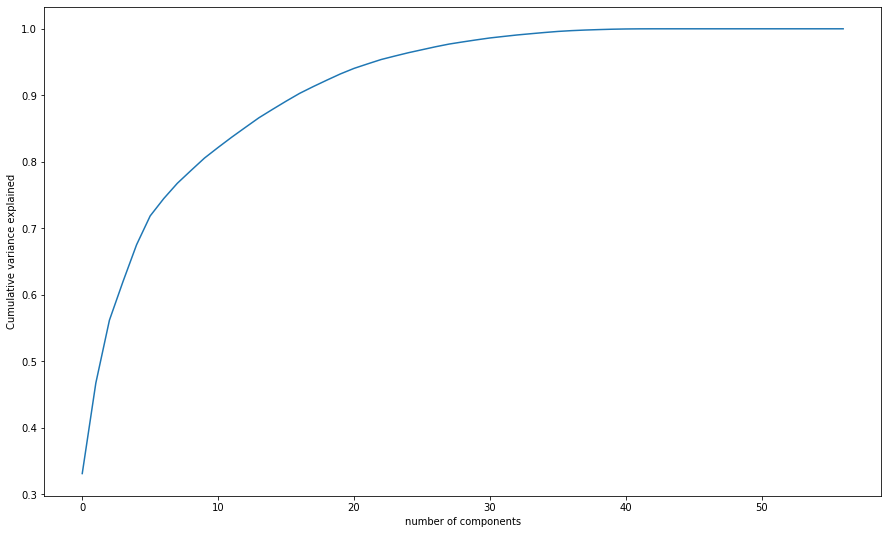

In [200]:
# For better understanding of obtained PCA components plotting SCREE plots
fig = plt.figure(figsize=[15,9])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Cumulative variance explained')
plt.show()

In [201]:
pca_final = IncrementalPCA(n_components=30)

In [202]:
df_train_pca = pca_final.fit_transform(X_train)

In [203]:
df_train_pca.shape

(46161, 30)

In [204]:
# for Visualization and checking correlation between components making and plotting correlation matrix
corr_matrix = np.corrcoef(df_train_pca.transpose())
corr_matrix.shape

(30, 30)

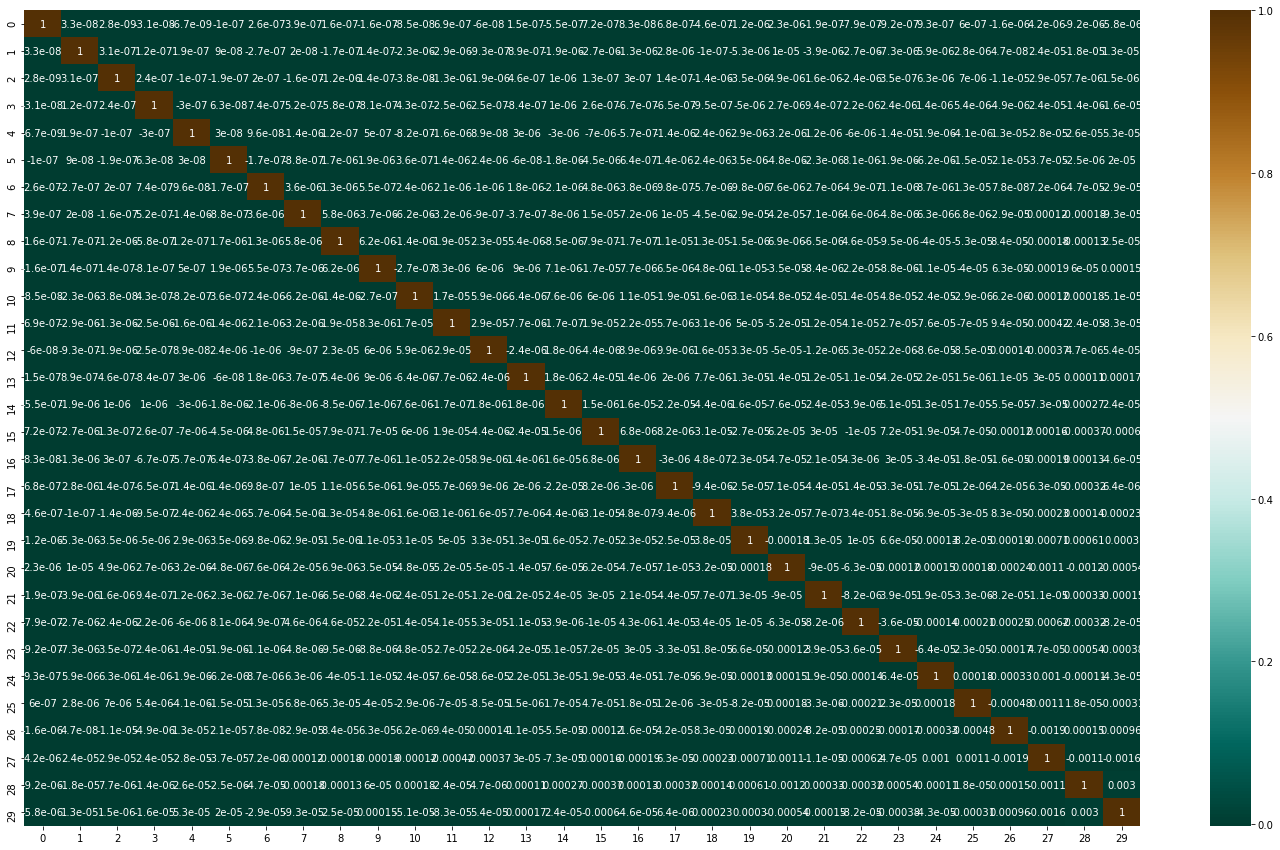

In [205]:
# Plotting Heat Map
plt.figure(figsize = (25,15))
sns.heatmap(corr_matrix,cmap="BrBG_r", annot=True)
plt.show()

#### Observation : There is no correlation in the given dataframe

In [206]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(19784, 30)

In [207]:
# fit and transform the whole dataset
X_pca = pca.fit_transform(X)

## Base Model

In [208]:
# List to store the model scores
model_score = []

In [209]:
# Will create a function and call it again and again for different models
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

## Logistic Regression

In [210]:
# Initializing the Logistic regression
model_1 = LogisticRegression(class_weight='balanced', random_state=42)
# fitting the pca training data
model_1.fit(df_train_pca, Y_train)
# predicting the testing pca data
Y_pred = model_1.predict(df_test_pca)
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# adding the model scores to score list 
model_score.append({'model_name':'LogisticRegression', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  88.72
ROC AUC score :  82.33
Precision score :  40.32
Recall score :  74.68


## Decision Tree

In [211]:
# initializing the Decision Tree
model_2 = DecisionTreeClassifier(class_weight='balanced', random_state=42)
# fitting the pca training data
model_2.fit(df_train_pca, Y_train)
# predicting the pca testing data
Y_pred = model_2.predict(df_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score.append({'model_name':'DecisionTreeClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  90.75
ROC AUC score :  68.14
Precision score :  43.91
Recall score :  41.02


## Random Forest

In [212]:
# initializing the randomforest
model_3 = RandomForestClassifier(class_weight='balanced', random_state=35)
# fitting the pca training data
model_3.fit(df_train_pca, Y_train)
# predicting the pca testing data
Y_pred = model_3.predict(df_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score.append({'model_name':'RandomForestClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  93.83
ROC AUC score :  70.1
Precision score :  72.38
Recall score :  41.63


###  Score list

In [213]:
# converting the model scores to dataframe
model_score_df = pd.DataFrame(model_score,columns=['model_name', 'acc_score', 'roc_score','precision_score','recall_score'])

# Order by highest recall score and roc_auc_score
model_score_df.sort_values(['acc_score','roc_score'], ascending=False)

,model_name,acc_score,roc_score,precision_score,recall_score
2,RandomForestClassifier,93.83,70.10,72.38,41.63
1,DecisionTreeClassifier,90.75,68.14,43.91,41.02
0,LogisticRegression,88.72,82.33,40.32,74.68


#### Observation : As in above table we can conclude that Random Forest is giving the Accuracy of 93.86% greater than other two

### Cross Validation

In [214]:
#Cross validating score for Logistic regression
cross_val_score(model_1, X_train, Y_train, cv=5, n_jobs=-1)
cross_val_score(model_1, X_train, Y_train, cv=5, n_jobs=-1).mean()

0.8801153241302908

In [215]:
#Cross validating score for Random Forest Classifier
cross_val_score(model_3, X_train, Y_train, cv=5, n_jobs=-1)
cross_val_score(model_3, X_train, Y_train, cv=5, n_jobs=-1).mean()

0.9420290248169806

#### Hyperparameter tuning for Random Forest Classifier

In [216]:
rf = RandomForestClassifier(random_state=35, n_jobs=-1)

In [217]:
hyper_params = {'max_depth': [3, 5, 10, 15, 20],
                'max_features': [3, 5, 7, 11, 15],
                'min_samples_leaf': [20, 50, 100, 200, 400],
                'n_estimators': [10, 25, 50, 80, 100]
               }

In [218]:
model_cv = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [219]:
model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=35),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11, 15],
                         'min_samples_leaf': [20, 50, 100, 200, 400],
                         'n_estimators': [10, 25, 50, 80, 100]},
             return_train_score=True, verbose=1)

In [220]:
# Now finding the best Estimator
print('\n Best estimator:')
print(model_cv.best_estimator_)


 Best estimator:
RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=20,
                       n_estimators=50, n_jobs=-1, random_state=35)


In [221]:
# Score on which best Estimator estimated
print('\n Best score:')
print(model_cv.best_score_ * 2 - 1)


 Best score:
0.8886073069603211


In [222]:
# Best Parameter accordingly after tuning hyperparameter
print('\n Best parameters:')
print(model_cv.best_params_)


 Best parameters:
{'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 20, 'n_estimators': 50}


In [223]:
# After getting Best Estimator, Best Score and Best Parameter 
#Now its time to Fit the best Estimator
model = model_cv.best_estimator_

# fitting the pca training dataset
model.fit(df_train_pca, Y_train)

# Predicting the model with the pca testing dataset
Y_pred = model.predict(df_test_pca)

# getting the predict probablities of pca testing dataset
Y_pred_proba = model.predict_proba(df_test_pca)

In [224]:
# Classification Report
print('\nClassification Report : \n\n', classification_report(Y_test, Y_pred))



Classification Report : 

               precision    recall  f1-score   support

           0       0.96      0.98      0.97     18141
           1       0.73      0.50      0.59      1643

    accuracy                           0.94     19784
   macro avg       0.84      0.74      0.78     19784
weighted avg       0.94      0.94      0.94     19784



In [225]:
# Confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))



TN = 17833, FP = 308, FN = 828, TP = 815




In [226]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)

Accuracy Score :  94.26
ROC AUC score :  73.95
Precision score :  72.57
Recall score :  49.6


#### Observation: During model evaluation we are gwtting 94.29% of Accuracy Score

In [227]:
### Evaluation of model on ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

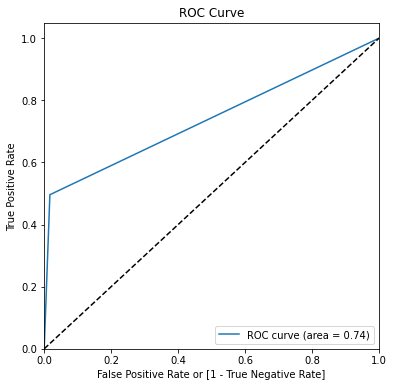

In [228]:
#plotting ROC curve for AUC
draw_roc(Y_test, Y_pred)

###### Observation: We have got the accuracy score of 94.18% with the best estimator which is slightly better than 
   ###### the Cross Validation mean score. Also the above Roc Curve seems to be in a good shape.


   


Optimal probability cutoff to minimize False Negatives

In [229]:
#  the dataset has to be framed with the predicted probabilities
Y_pred_final = pd.DataFrame({'actual':Y_test,'pred_nonchurn_prob':Y_pred_proba[:,0],'pred_churn_prob':Y_pred_proba[:,1],'predicted':Y_pred})
Y_pred_final.head(5)

,actual,pred_nonchurn_prob,pred_churn_prob,predicted
id,,,,
58031,0,0.990147,0.009853,0
40592,0,0.341063,0.658937,1
29661,0,0.981091,0.018909,0
60988,0,0.979851,0.020149,0
12218,0,0.898162,0.101838,0


In [230]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_pred_final[i]= Y_pred_final['pred_churn_prob'].map( lambda x: 1 if x > i else 0)
Y_pred_final.head()

,actual,pred_nonchurn_prob,pred_churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
id,,,,,,,,,,,,,,
58031,0,0.990147,0.009853,0,1,0,0,0,0,0,0,0,0,0
40592,0,0.341063,0.658937,1,1,1,1,1,1,1,1,0,0,0
29661,0,0.981091,0.018909,0,1,0,0,0,0,0,0,0,0,0
60988,0,0.979851,0.020149,0,1,0,0,0,0,0,0,0,0,0
12218,0,0.898162,0.101838,0,1,1,0,0,0,0,0,0,0,0


In [231]:
# Now calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix( Y_pred_final['actual'], Y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083047  0.000000  1.000000
0.1   0.1  0.890012  0.904415  0.730980
0.2   0.2  0.933633  0.962791  0.611686
0.3   0.3  0.940861  0.975801  0.555082
0.4   0.4  0.943035  0.980652  0.527693
0.5   0.5  0.942580  0.983022  0.496044
0.6   0.6  0.940912  0.986274  0.440049
0.7   0.7  0.932723  0.991621  0.282410
0.8   0.8  0.918571  0.999118  0.029215
0.9   0.9  0.916953  1.000000  0.000000


<AxesSubplot:xlabel='prob'>

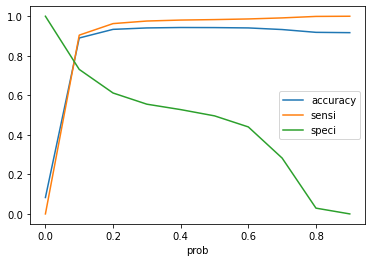

In [232]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [233]:
Y_pred_final['final_predicted'] = Y_pred_final['pred_churn_prob'].map( lambda x: 1 if x > 0.1 else 0)

### Final Model Evaluation

In [234]:
# Classification Report
print('\nClassification Report : \n\n', classification_report(Y_test, Y_pred_final['final_predicted']))

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_final['final_predicted']).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred_final['final_predicted'])


Classification Report : 

               precision    recall  f1-score   support

           0       0.97      0.90      0.94     18141
           1       0.41      0.73      0.52      1643

    accuracy                           0.89     19784
   macro avg       0.69      0.82      0.73     19784
weighted avg       0.93      0.89      0.90     19784


TN = 16407, FP = 1734, FN = 442, TP = 1201


Accuracy Score :  89.0
ROC AUC score :  81.77
Precision score :  40.92
Recall score :  73.1


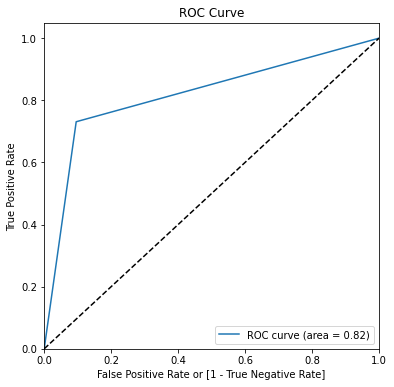

In [235]:
# ROC-AUC curve using draw_roc function defined earlier
draw_roc(Y_test, Y_pred_final['final_predicted'])

##### Observation : Analysing above ROC curve we find that it is a good fit with Accuracy:89% and Recall: 73.1%

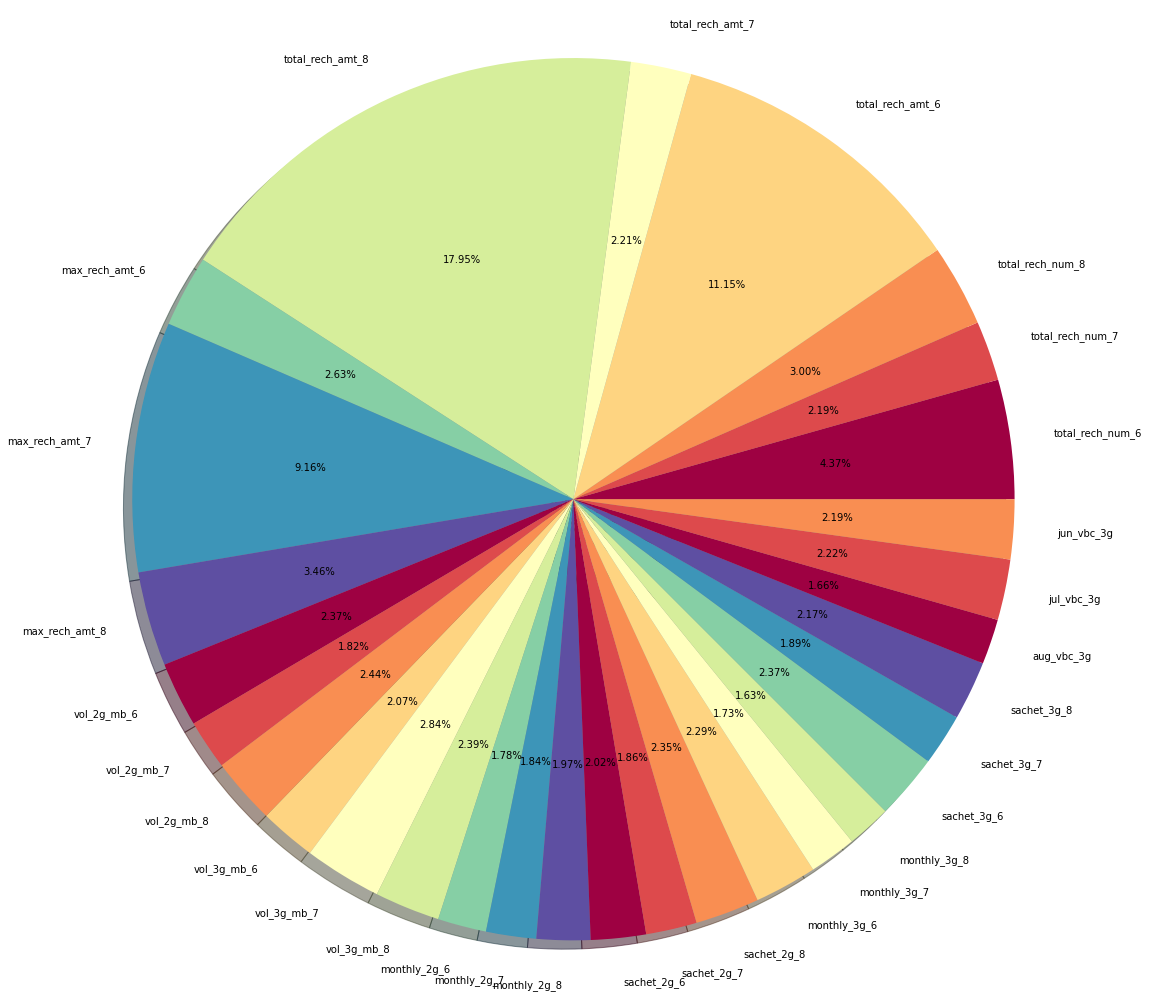

In [264]:
#Plotting final observation of the data for Conclusion
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 9)]

plt.figure(figsize=(20,18))
plt.pie(model_3.feature_importances_, labels=new_var, autopct='%2.2f%%', shadow=True, colors=colors)
plt.axis('equal')
plt.show()

Conclusion :As per above Pie chart  it is clear that total recharge amount in the month of June and August were maximum. 
    So it will be better if we focus on the customers who made the last recharge on the month of June and August.
    It will help us in getting maximum churn

##### Performing analysis on test data and calculating churn probabiltiy

In [236]:
#fetching unseen data from test.csv, as performed for shape of data in start of analysis
unseen= pd.read_csv("test.csv")
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,...,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,413.329,450.93,609.03,700.68,60.94,23.84,74.16,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.78,14.56,2.39,2.66,10.94,0.00,0.00,0.00,0.0,0.00,0.00,2.84,3.44,25.51,450.48,608.24,686.11,58.54,21.18,63.18,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [237]:
# Furhter exploring numrical variable characteristics through describe function
unseen.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,...,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.0,29684.0,29684.0,29684.0,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.0,28828.0,28325.0,28831.000000,28828.000000,28325.000000,...,30000.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,7585.000000,7706.000000,7922.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,84998.500000,109.0,0.0,0.0,0.0,282.644348,279.355021,279.845167,130.629693,133.148632,133.111348,195.745473,196.792375,196.647889,10.380431,7.465889,7.967267,13.269785,9.763957,10.440251,47.557601,47.188688,46.359887,93.584273,92.793180,93.238288,3.769281,3.830238,3.716231,1.116132,1.385891,1.464202,144.918443,143.819463,143.321709,77.988809,82.187570,82.840749,85.311712,89.089166,88.086236,1.135152,1.187272,1.091321,0.0,0.0,0.0,164.438342,172.466703,172.020983,...,62.996933,2.454977,2.634960,2.650972,126.146473,127.488451,126.513254,1.863151,2.017778,2.016915,0.591826,0.617181,0.634057,192.068004,199.880903,199.178710,52.210692,51.205981,50.269665,119.586364,129.13912,135.233704,88.362531,90.006250,92.464772,85.318916,86.072967,87.183175,0.024654,0.020633,0.020449,0.080467,0.082800,0.081167,0.390600,0.435500,0.451433,0.076167,0.080567,0.085233,0.073467,0.077967,0.082200,0.909954,0.906956,0.891946,1218.023200,68.314097,68.946576,59.891621
std,8660.398374,0.0,0.0,0.0,0.0,314.560212,323.205370,326.437029,290.677420,302.921820,301.951806,316.923836,333.628481,334.277643,99.973352,103.337675,94.622596,66.475975,58.325466,64.933372,150.588656,156.664295,145.087354,164.481651,165.674188,164.516683,16.156500,15.772920,13.864608,4.695667,6.559241,7.316747,251.092969,254.278712,247.240694,246.248819,256.339646,261.860321,255.252441,

In [238]:
# Recalling new_vars column in which we stored all of columns who have less correlation in earlier
new_var

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g']

In [239]:
submission = unseen.set_index('id')[new_var]
submission.shape

(30000, 30)

In [240]:
#For our Kaggle submission we need to create new churn_prob column using the build model
unseen['churn_probability'] = model_3.predict(submission)
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [265]:
#Lets export the this data to submission.csv for Kaggle submission
output.to_csv('submission.csv',index=False)